### Depndencies

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from random import randint as rnd


### Variables

In [2]:
N = 8
population_size = 100
mutation_rate = 0.8
generation = 10000


### Initial Population

In [3]:
def initial_population(n, p_size):
    population_list = []
    for i in range(p_size):
        population_list.append(list(np.random.choice(range(1, n + 1), n , replace=False)))
    for j in population_list:
        j.append(None)
    return population_list

### Fitness Function

In [4]:
def fitness(p_list, n):
    length = len(p_list)
    for i in range(length):
        encounter = 0
        for j in range(n):
            for k in range(j+1, n):
                if p_list[i][j] == p_list[i][k] or abs(j - k) == abs(p_list[i][j] - p_list[i][k]):
                    encounter += 1
        p_list[i][-1] = encounter
    return p_list


### Parent Selection

In [5]:
def select_parents(p_list):
    parents = random.sample(p_list, 5)
    best_parent = sorted(parents, key=lambda x:x[-1])
    return [best_parent[0], best_parent[1]]                                                                                                          

### CrossOver

In [6]:
def crossover(parents):
   cut = rnd(0, 7)
   first_child = parents[0][:cut].copy() 
   first_child.extend([i for i in parents[1][:-1] if i not in first_child])
   second_child = parents[1][:cut].copy()
   second_child.extend([i for i in parents[0][:-1] if i not in second_child])
   return [first_child, second_child]


### Mutation

In [7]:
def swap_mutation(childs, mr):
    for i in range(len(childs)):
        if random.random() < mr:
            rnd1 = rnd(0, len(childs[i]) - 2)
            rnd2 = rnd(0, len(childs[i]) - 2)
            childs[i][rnd1], childs[i][rnd2] = childs[i][rnd2], childs[i][rnd1]
    for n in childs:
        n.append(None)
    return childs

### Survival Selection

In [8]:
def survival_selection(p_list, childs):
    p_list.pop()
    p_list.pop()
    p_list.extend(childs)
    return p_list

## Main

*** generation : 0 ***
best solution so far !! : [8, 3, 6, 2, 7, 4, 1, 5, 2] 
------------------
*** generation : 1 ***
best solution so far !! : [8, 3, 6, 2, 7, 4, 1, 5, 2] 
------------------
*** generation : 2 ***
best solution so far !! : [8, 3, 6, 2, 7, 4, 1, 5, 2] 
------------------
*** generation : 3 ***
best solution so far !! : [8, 3, 6, 2, 7, 4, 1, 5, 2] 
------------------
*** generation : 4 ***
best solution so far !! : [7, 1, 8, 2, 5, 3, 6, 4, 1] 
------------------
*** generation : 5 ***
best solution so far !! : [7, 1, 8, 2, 5, 3, 6, 4, 1] 
------------------
*** generation : 6 ***
best solution so far !! : [7, 1, 8, 2, 5, 3, 6, 4, 1] 
------------------
*** generation : 7 ***
best solution so far !! : [7, 1, 8, 2, 5, 3, 6, 4, 1] 
------------------
*** generation : 8 ***
best solution so far !! : [7, 1, 8, 2, 5, 3, 6, 4, 1] 
------------------
*** generation : 9 ***
best solution so far !! : [7, 1, 8, 2, 5, 3, 6, 4, 1] 
------------------
*** generation : 10 ***
best s

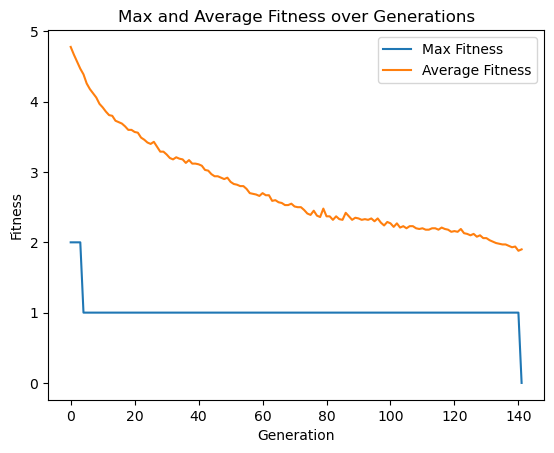

In [9]:

max_fit = []
count_max = []
avg_fit = []

def genetic_alg():

    #initial population
    population = initial_population(N, population_size)
    population = fitness(population, N)
    population = sorted(population, key=lambda x:x[-1])

    for g in range(generation):
        print(f'*** generation : {g} ***')
        parents = select_parents(population)
        childs = crossover(parents)
        childs = swap_mutation(childs, mutation_rate) 
        childs = fitness(childs, N)
        population = sorted(population, key=lambda x:x[-1])
        selection = survival_selection(population, childs)
        
        max_fit.append(selection[0][-1])
        
        sum = 0
        for k in selection:
            sum += k[-1]
        avg_fit.append(sum / population_size)

        

        if selection[0][-1] == 0 :
            print(f'best solution found :) : {selection[0]} \n------------------')
            break
        else:
            print(f'best solution so far !! : {selection[0]} \n------------------')                                     

def plot_fit(max_fitness, avg_fitness):
    plt.plot(max_fitness, label='Max Fitness')
    plt.plot(avg_fitness, label='Average Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend()
    plt.title('Max and Average Fitness over Generations')
    plt.show()

genetic_alg()
def plot_fit(max_fitness, avg_fitness):
    plt.plot(max_fitness, label='Max Fitness')
    plt.plot(avg_fitness, label='Average Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend()
    plt.title('Max and Average Fitness over Generations')
    plt.show()